# Exploratory Analysis and Feature Selection

### Install libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

### Read in data file

In [22]:
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,0.0,1.0,360.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,0.0,1.0,420.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,0.0,4.0,270.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,0.0,2.0,270.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,0.0,4.0,270.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


#### From the below summary stats output, you'll find that participants are generally older in age. Gender is evenly distributed, for the most part. More people have less than a college education and are above poverty level in income. Most rate general health as 'good'. 

#### Regarding the target variable (mental health), it seems that most people reported no days with poor mental health over the 30-day period. We'll want to look at this more closely to see if enough people reported some amount of poor mental health days. If this number is too low, this might not be a good target variable. 

In [23]:
pd.set_option('display.max_columns', 50)
LLCP2.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,PA1MIN_,EXERANY2,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,4.500160e+05,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000
mean,0.441595,4.416081,0.713664,0.374187,3.790430,0.054351,2.404368,4.133191e+02,0.744936,0.807718,0.926998,0.532363,0.128591,0.524508,0.198235,2.765302,4.321413,3.537850,0.317053
std,0.496578,1.583006,0.452049,0.483913,1.324389,0.226710,1.168220,6.945976e+02,0.435898,0.394094,0.260140,0.498952,0.334747,0.499400,0.398671,7.255185,8.825211,7.859638,0.465329
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.397605e-79,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.960000e+02,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,0.000000,4.000000,0.000000,2.000000,2.700000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,1.000000,1.000000,5.000000,0.000000,4.000000,3.640000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,5.000000,1.000000,4.000000,8.999000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


### After a quick inspection, it look slike we should check PA1MIN_ for outliers, but the other variables seem ok, based on the min/max values. Let's look at a boxplot and scatterplot with the target variable.

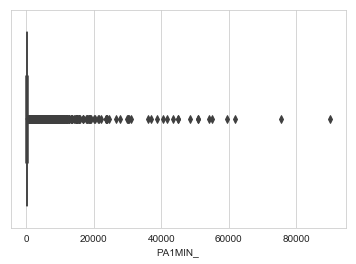

In [25]:
sns.boxplot(x=LLCP2['PA1MIN_'])

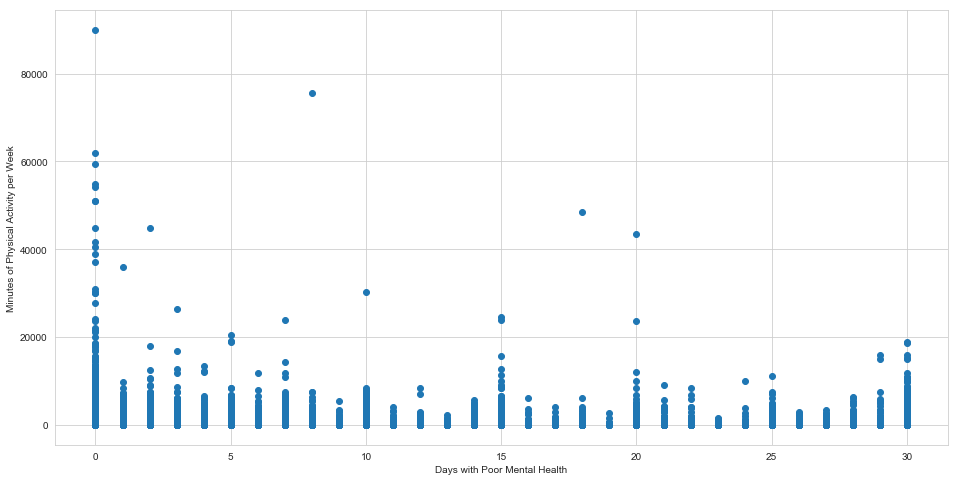

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(LLCP2['MENTHLTH'], LLCP2['PA1MIN_'])
ax.set_xlabel('Days with Poor Mental Health')
ax.set_ylabel('Minutes of Physical Activity per Week')
plt.show()

### As you can see, the plots show a massive range of scores, with most being close to '0'. For convenience, I will simply drop this variable because we have two other variables that measure physical activity and seem to be ok. There are ways to deal with outliers, but I don't feel it's worth it for this. Especially when you consider that even the lowers bar on the graphs (20,000) is equal to almost 2 weeks of time. This doesn't make sense based on the question linked to the variable.

In [27]:
LLCP2 = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','EXERANY2','_RFHLTH','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']]
LLCP2.shape

(450016, 18)

#### Let's look at some bar graphs for the dependent/target variables

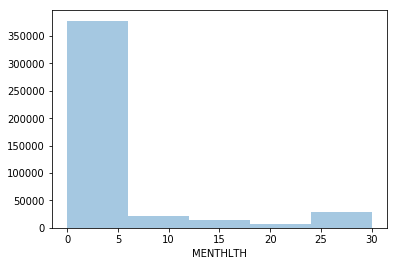

In [11]:
sns.distplot(LLCP2['MENTHLTH'], kde=False, bins=5);

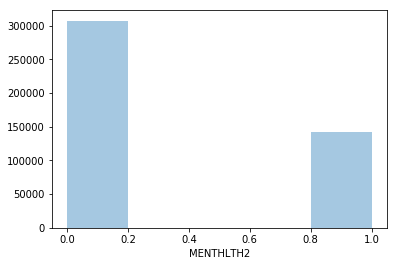

In [12]:
sns.distplot(LLCP2['MENTHLTH2'], kde=False, bins=5);

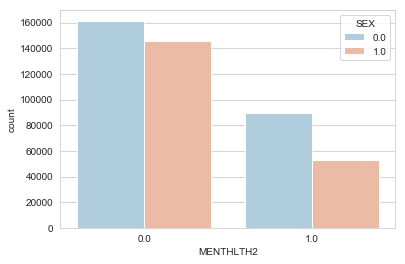

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='MENTHLTH2',hue='SEX',data=LLCP2,palette='RdBu_r')

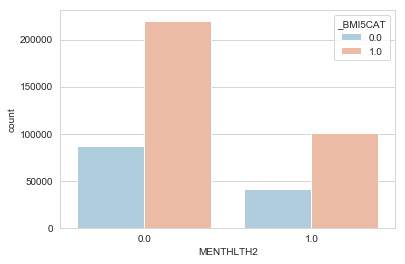

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='MENTHLTH2',hue='_BMI5CAT',data=LLCP2,palette='RdBu_r')

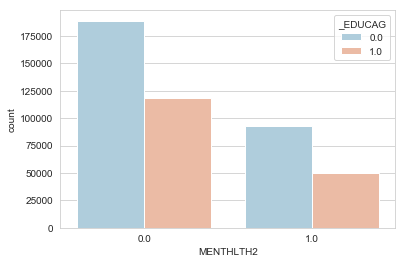

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='MENTHLTH2',hue='_EDUCAG',data=LLCP2,palette='RdBu_r')

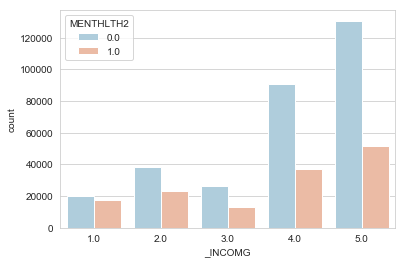

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='_INCOMG', hue='MENTHLTH2',data=LLCP2,palette='RdBu_r')

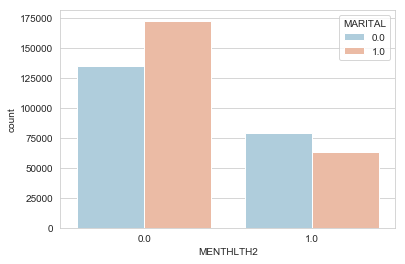

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='MENTHLTH2',hue='MARITAL',data=LLCP2,palette='RdBu_r')

In [28]:
LLCP2[['SEX','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','EXERANY2','_RFHLTH','_HCVU651','EMPLOY1',
       'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH', 
       'MENTHLTH2']].corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,SEX,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,EXERANY2,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
SEX,1.0,0.086,0.017,0.09,0.018,-0.042,0.039,0.021,-0.05,0.14,0.36,0.074,-0.12,-0.033,-0.041,-0.066,-0.097
_BMI5CAT,0.086,1.0,-0.072,-0.025,-0.038,0.092,-0.079,-0.079,-0.00088,-0.0091,0.044,0.047,0.041,0.041,0.056,0.018,-0.0071
_EDUCAG,0.017,-0.072,1.0,0.34,0.015,-0.14,0.16,0.18,0.12,0.13,0.0059,0.16,-0.059,-0.1,-0.12,-0.095,-0.032
_INCOMG,0.09,-0.025,0.34,1.0,0.04,-0.14,0.16,0.28,0.15,0.27,0.046,0.37,-0.15,-0.21,-0.22,-0.18,-0.11
_RFDRHV5,0.018,-0.038,0.015,0.04,1.0,-0.018,0.0084,0.028,-0.023,0.049,0.0004,-0.015,0.018,-0.0093,-0.021,0.031,0.038
_PACAT1,-0.042,0.092,-0.14,-0.14,-0.018,1.0,-0.8,-0.19,-0.041,-0.019,-0.029,-0.062,0.092,0.16,0.17,0.1,0.068
EXERANY2,0.039,-0.079,0.16,0.16,0.0084,-0.8,1.0,0.21,0.031,0.099,0.00037,0.064,-0.083,-0.17,-0.19,-0.1,-0.038
_RFHLTH,0.021,-0.079,0.18,0.28,0.028,-0.19,0.21,1.0,0.027,0.25,-0.023,0.12,-0.22,-0.42,-0.52,-0.28,-0.18
_HCVU651,-0.05,-0.00088,0.12,0.15,-0.023,-0.041,0.031,0.027,1.0,-0.085,0.061,0.085,-0.0081,-0.0019,0.011,-0.055,-0.043
EMPLOY1,0.14,-0.0091,0.13,0.27,0.049,-0.019,0.099,0.25,-0.085,1.0,-0.11,0.068,-0.096,-0.22,-0.23,-0.065,0.022


### You can see by the above table, most coefficients seems fairly small, but the output below shows many highly statistically significant correlations. This is typical with very large datasets. I'm concerned with the correlation between EXERANY2 and PACAT1...it's very high at -.8 and indicates likely multicollinearity. We are going to drop EXERANY2 from the analysis due to its lower correlation. 

In [32]:
LLCP2 = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1','VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH','MENTHLTH','MENTHLTH2']]
LLCP2.shape

(450016, 17)

In [33]:
pearson_coef, p_value = stats.pearsonr(LLCP2["SEX"], LLCP2["MENTHLTH"])
print("Pearson Corr for SEX and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_AGE_G"], LLCP2["MENTHLTH"])
print("Pearson Corr for _AGE_G and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_BMI5CAT"], LLCP2["MENTHLTH"])
print("Pearson Corr for _BMI5CAT and MENTHLTH is", pearson_coef, " with p =", p_value)  

pearson_coef, p_value = stats.pearsonr(LLCP2["_EDUCAG"], LLCP2["MENTHLTH"])
print("Pearson Corr for _EDUCAG and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_INCOMG"], LLCP2["MENTHLTH"])
print("Pearson Corr _INCOMG and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFDRHV5"], LLCP2["MENTHLTH"])
print("Pearson Corr for _RFDRHV5 and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_PACAT1"], LLCP2["MENTHLTH"])
print("Pearson Corr for _PACAT1 and MENTHLTH is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for _RFHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_HCVU651"], LLCP2["MENTHLTH"])
print("Pearson Corr for _HCVU651 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["EMPLOY1"], LLCP2["MENTHLTH"])
print("Pearson Corr for EMPLOY1 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["VETERAN3"], LLCP2["MENTHLTH"])
print("Pearson Corr for VETERAN3 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["MARITAL"], LLCP2["MENTHLTH"])
print("Pearson Corr for MARITAL and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["ADDEPEV2"], LLCP2["MENTHLTH"])
print("Pearson Corr for ADDEPEV2 and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["POORHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for POORHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["PHYSHLTH"], LLCP2["MENTHLTH"])
print("Pearson Corr for PHYSHLTH and MENTHLTH is", pearson_coef, " with p =", p_value)

Pearson Corr for SEX and MENTHLTH is -0.06574866960738462  with p = 0.0
Pearson Corr for _AGE_G and MENTHLTH is -0.10887893602713436  with p = 0.0
Pearson Corr for _BMI5CAT and MENTHLTH is 0.01791642892675432  with p = 2.794754409205605e-33
Pearson Corr for _EDUCAG and MENTHLTH is -0.09464048125471797  with p = 0.0
Pearson Corr _INCOMG and MENTHLTH is -0.17690316052408112  with p = 0.0
Pearson Corr for _RFDRHV5 and MENTHLTH is 0.03130924709792151  with p = 5.5017441912159066e-98
Pearson Corr for _PACAT1 and MENTHLTH is 0.10444108764504574  with p = 0.0
Pearson Corr for _RFHLTH and MENTHLTH is -0.279491342046423  with p = 0.0
Pearson Corr for _HCVU651 and MENTHLTH is -0.054940118466668075  with p = 8.541113014807475e-298
Pearson Corr for EMPLOY1 and MENTHLTH is -0.06495275795156687  with p = 0.0
Pearson Corr for VETERAN3 and MENTHLTH is -0.030443191710687423  with p = 9.632602843082177e-93
Pearson Corr for MARITAL and MENTHLTH is -0.11977694106385417  with p = 0.0
Pearson Corr for ADDEP

In [54]:
pearson_coef, p_value = stats.pearsonr(LLCP2["SEX"], LLCP2["MENTHLTH2"])
print("Pearson Corr for SEX and MENTHLTH2 is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_AGE_G"], LLCP2["MENTHLTH2"])
print("Pearson Corr for _AGE_G and MENTHLTH2 is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_BMI5CAT"], LLCP2["MENTHLTH2"])
print("Pearson Corr for _BMI5CAT and MENTHLTH2 is", pearson_coef, " with p =", p_value)  

pearson_coef, p_value = stats.pearsonr(LLCP2["_EDUCAG"], LLCP2["MENTHLTH2"])
print("Pearson Corr for _EDUCAG and MENTHLTH2 is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_INCOMG"], LLCP2["MENTHLTH2"])
print("Pearson Corr _INCOMG and MENTHLTH2 is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFDRHV5"], LLCP2["MENTHLTH2"])
print("Pearson Corr for _RFDRHV5 and MENTHLTH2 is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_PACAT1"], LLCP2["MENTHLTH2"])
print("Pearson Corr for _PACAT1 and MENTHLTH2 is", pearson_coef, " with p =", p_value) 

pearson_coef, p_value = stats.pearsonr(LLCP2["_RFHLTH"], LLCP2["MENTHLTH2"])
print("Pearson Corr for _RFHLTH and MENTHLTH2 is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["_HCVU651"], LLCP2["MENTHLTH2"])
print("Pearson Corr for _HCVU651 and MENTHLTH2 is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["EMPLOY1"], LLCP2["MENTHLTH2"])
print("Pearson Corr for EMPLOY1 and MENTHLTH2 is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["VETERAN3"], LLCP2["MENTHLTH2"])
print("Pearson Corr for VETERAN3 and MENTHLTH2 is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["MARITAL"], LLCP2["MENTHLTH2"])
print("Pearson Corr for MARITAL and MENTHLTH2 is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["ADDEPEV2"], LLCP2["MENTHLTH2"])
print("Pearson Corr for ADDEPEV2 and MENTHLTH2 is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["POORHLTH"], LLCP2["MENTHLTH2"])
print("Pearson Corr for POORHLTH and MENTHLTH2 is", pearson_coef, " with p =", p_value)

pearson_coef, p_value = stats.pearsonr(LLCP2["PHYSHLTH"], LLCP2["MENTHLTH2"])
print("Pearson Corr for PHYSHLTH and MENTHLTH2 is", pearson_coef, " with p = ", p_value)

Pearson Corr for SEX and MENTHLTH2 is -0.09717083782866302  with p = 0.0
Pearson Corr for _AGE_G and MENTHLTH2 is -0.18830764061465088  with p = 0.0
Pearson Corr for _BMI5CAT and MENTHLTH2 is -0.007117971294621258  with p = 1.7969617376859187e-06
Pearson Corr for _EDUCAG and MENTHLTH2 is -0.032462869115269286  with p = 3.376229512784421e-105
Pearson Corr _INCOMG and MENTHLTH2 is -0.11045075727356722  with p = 0.0
Pearson Corr for _RFDRHV5 and MENTHLTH2 is 0.038045848700076455  with p = 8.800561398435739e-144
Pearson Corr for _PACAT1 and MENTHLTH2 is 0.06768642695566283  with p = 0.0
Pearson Corr for _RFHLTH and MENTHLTH2 is -0.18358495732052899  with p = 0.0
Pearson Corr for _HCVU651 and MENTHLTH2 is -0.04297728618775735  with p = 6.060715891350152e-183
Pearson Corr for EMPLOY1 and MENTHLTH2 is 0.022443236814606082  with p = 3.082090884238127e-51
Pearson Corr for VETERAN3 and MENTHLTH2 is -0.07049066226815193  with p = 0.0
Pearson Corr for MARITAL and MENTHLTH2 is -0.10824853562828138 

## Feature Selection

### 1. Filter method using a heat map and correlations

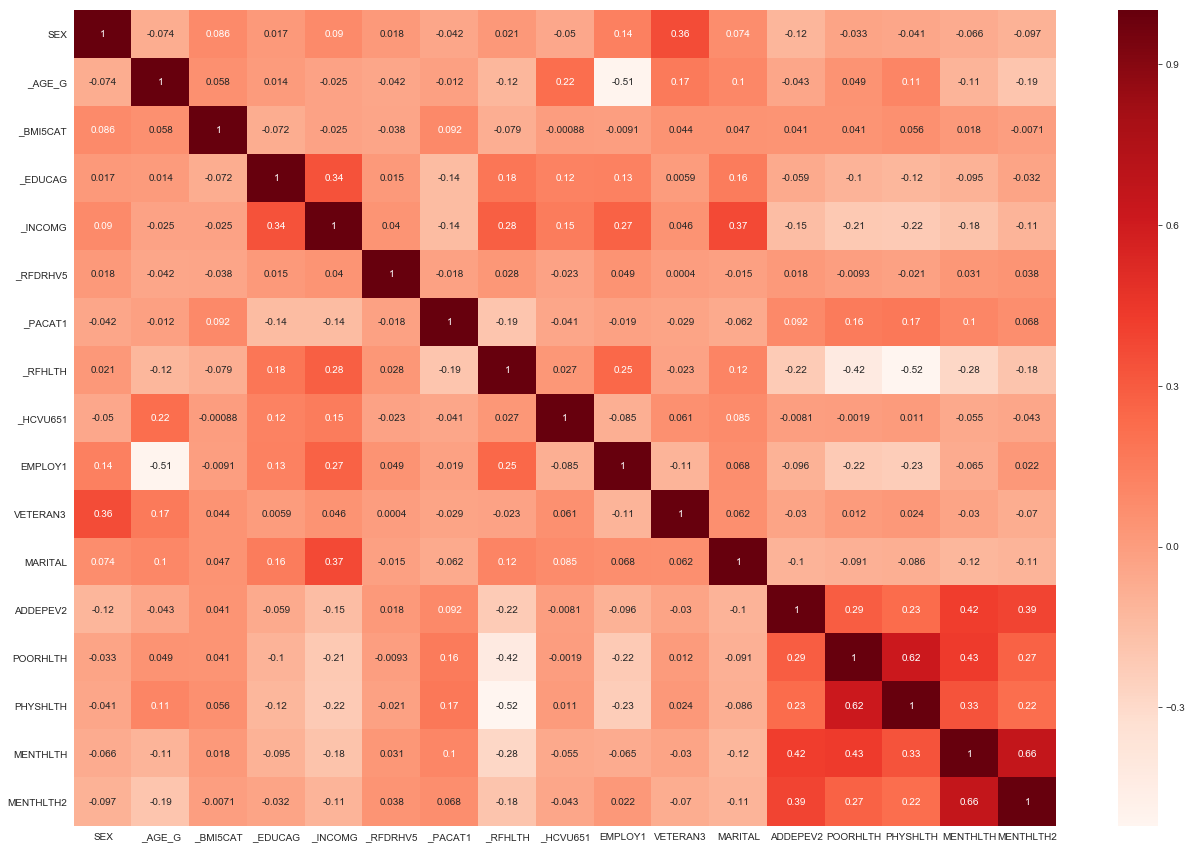

In [35]:
plt.figure(figsize=(22,15))
cor = LLCP2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Now let's only retain variables with correlations >1.0, since most relationship magnitudes are small, though significant statistically.

In [36]:
cor_target = abs(cor["MENTHLTH"])   #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

_AGE_G       0.108879
_INCOMG      0.176903
_PACAT1      0.104441
_RFHLTH      0.279491
MARITAL      0.119777
ADDEPEV2     0.420316
POORHLTH     0.430670
PHYSHLTH     0.334281
MENTHLTH     1.000000
MENTHLTH2    0.660640
Name: MENTHLTH, dtype: float64

In [37]:
cor_target = abs(cor["MENTHLTH2"])   #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

_AGE_G       0.188308
_INCOMG      0.110451
_RFHLTH      0.183585
MARITAL      0.108249
ADDEPEV2     0.389969
POORHLTH     0.273007
PHYSHLTH     0.217608
MENTHLTH     0.660640
MENTHLTH2    1.000000
Name: MENTHLTH2, dtype: float64

#### This method selects 8 variables to include as features for the continuous MENTHLTH and 7 for the binary MENTHLTH2

### 2. Wrapper method using RFE (Recursive Feature Elimination)

In [38]:
X1 = LLCP2.drop(['MENTHLTH','MENTHLTH2'],1)   #Feature Matrix
y1 = LLCP2['MENTHLTH']          #Target Variable
y2 = LLCP2['MENTHLTH2']

#### First, let's do it for MENTHLTH

In [39]:
model = LinearRegression()  #Initializing RFE model
rfe = RFE(model, 10)  #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)  #Fitting the data to model
model.fit(X_rfe,y1)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True  True  True False  True  True False False  True
  True  True False]
[1 1 4 1 1 1 6 1 1 3 2 1 1 1 5]


In [55]:
#no of features
nof_list=np.arange(1,15)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 14
Score with 14 features: 0.313708


In [56]:
cols = list(X1.columns)
model = LinearRegression()       #Initializing RFE model
rfe = RFE(model, 14)             #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y1)   #Fitting the data to model
model.fit(X_rfe,y1)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SEX', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_INCOMG', '_RFDRHV5',
       '_RFHLTH', '_HCVU651', 'EMPLOY1', 'VETERAN3', 'MARITAL', 'ADDEPEV2',
       'POORHLTH', 'PHYSHLTH'],
      dtype='object')


#### Now, do it for MENTHLTH2 using logistic regression

In [42]:
model = LogisticRegression(solver='liblinear')  #Initializing RFE model
rfe = RFE(model, 10)  #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y2)  #Fitting the data to model
model.fit(X_rfe,y2)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False  True False  True False  True  True  True
  True False False]
[1 1 1 1 3 1 5 1 6 1 1 1 1 2 4]


In [57]:
#no of features
nof_list=np.arange(1,15)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X1,y2, test_size = 0.3, random_state = 0)
    model = LogisticRegression(solver='liblinear')
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.762275


In [58]:
cols = list(X1.columns)
model = LogisticRegression(solver='liblinear')       #Initializing RFE model
rfe = RFE(model, 11)             #Transforming data using RFE
X_rfe = rfe.fit_transform(X1,y2)   #Fitting the data to model
model.fit(X_rfe,y2)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['SEX', '_AGE_G', '_BMI5CAT', '_EDUCAG', '_RFDRHV5', '_RFHLTH',
       'EMPLOY1', 'VETERAN3', 'MARITAL', 'ADDEPEV2', 'POORHLTH'],
      dtype='object')


### 3. Embedded Method using LASSO regression

In [59]:
reg = LassoCV(max_iter=10000, cv=3)
reg.fit(X1, y1)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X1,y1))
coef = pd.Series(reg.coef_, index = X1.columns)

Best alpha using built-in LassoCV: 0.024558
Best score using built-in LassoCV: 0.307513


In [60]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 11 variables and eliminated the other 4 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

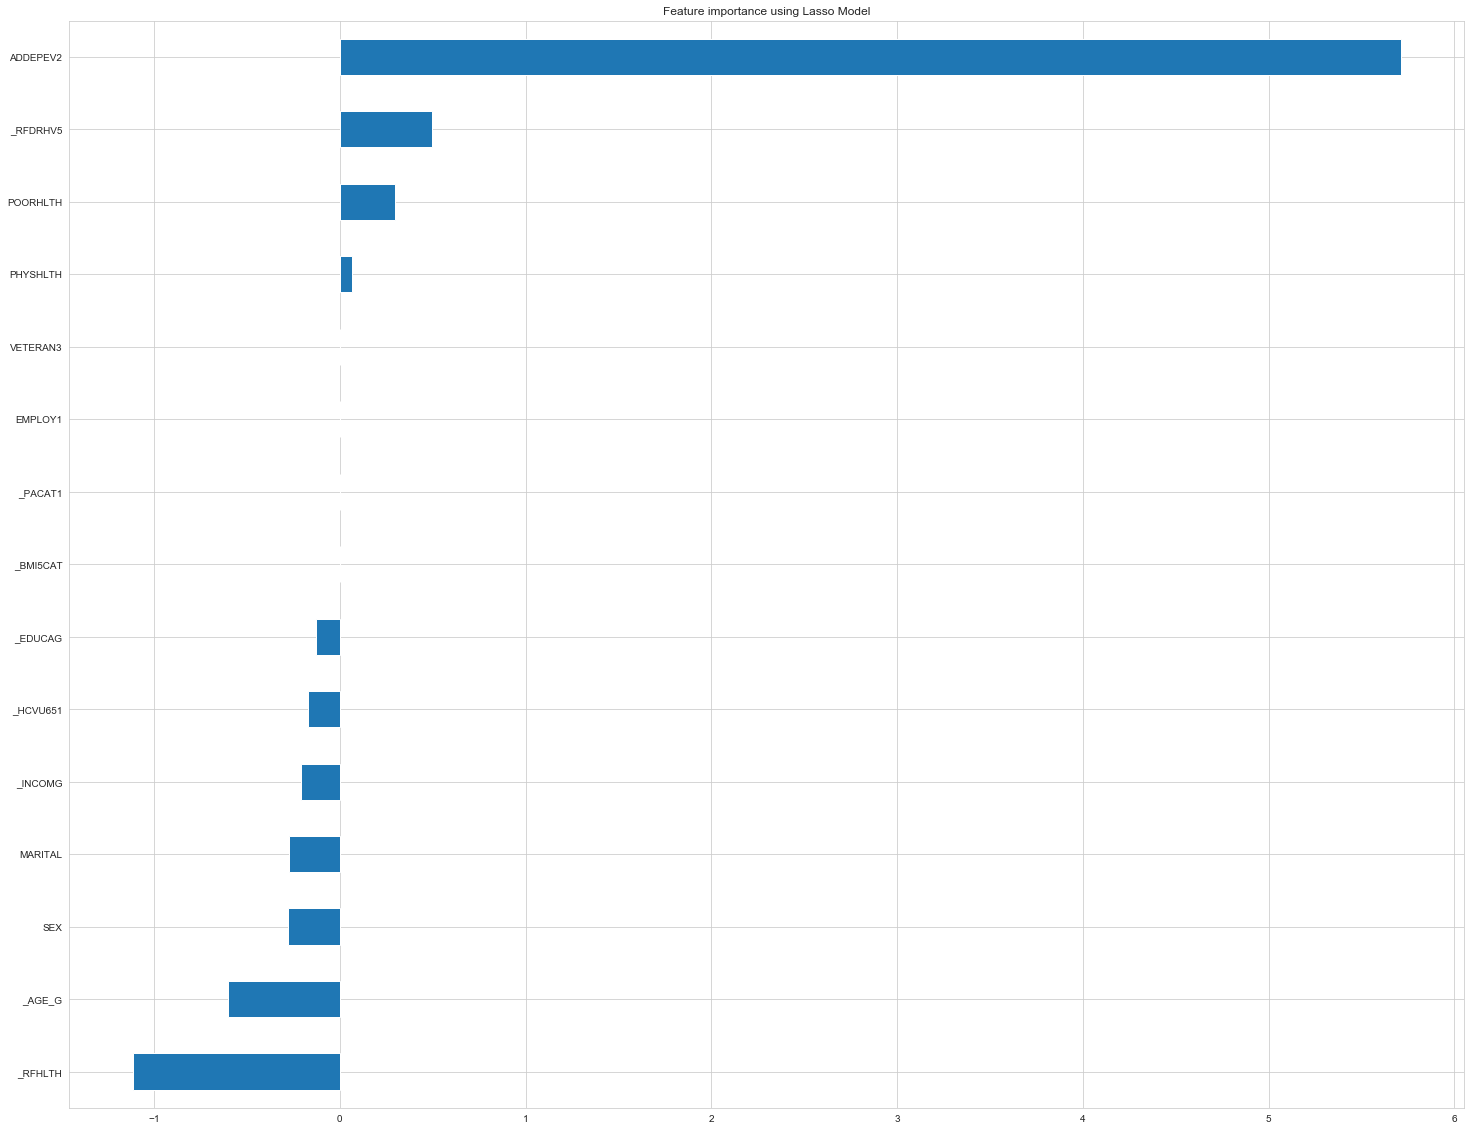

In [61]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [62]:
reg = LassoCV(max_iter=10000, cv=3)
reg.fit(X1, y2)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X1,y2))
coef = pd.Series(reg.coef_, index = X1.columns)

Best alpha using built-in LassoCV: 0.000922
Best score using built-in LassoCV: 0.226295


In [63]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 1 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

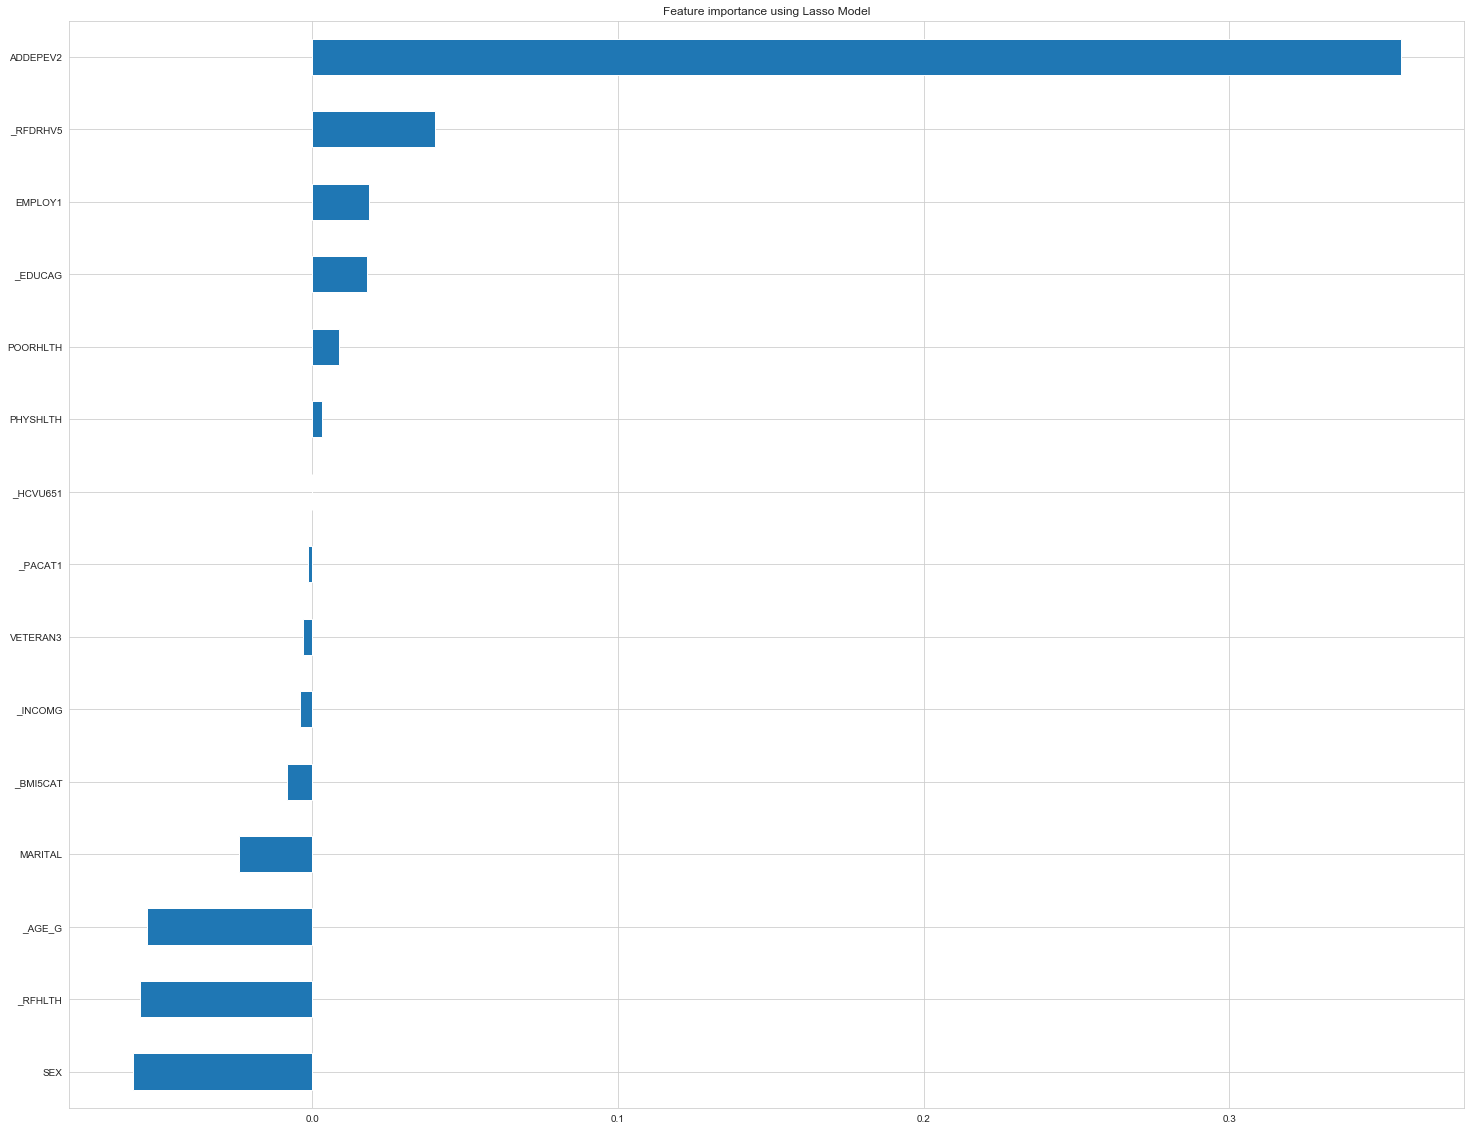

In [64]:
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (25.0, 20.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### As you can see, it is difficult to select features for this set, given that all variables were originally chosen based on theory and previous research. All the methods shown drop different valriables. There is no consensus. These methods of feature selection would be more useful with a larger set of available features, particularly if there was no theory to use as guidance. 

### This being the case, I'm going to use all 15 features in the models.

In [65]:
LLCP2.to_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv',header=True, index=None)